<a href="https://colab.research.google.com/github/Saisruthi1511/elevate-labs_-PROJECT-1/blob/main/PRJ_1_ELipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy seaborn matplotlib  nltk vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving imdb_top_1000.csv to imdb_top_1000.csv


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('imdb_top_1000.csv')

# Check first few rows
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
import pandas as pd
df = pd.read_csv("imdb_top_1000.csv")
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Choose the column you want to analyze: 'Overview' or 'Series_Title'
column_to_analyze = 'Overview'  # Change to 'Series_Title' if needed

df['sentiment_score'] = df[column_to_analyze].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [ ]:
def categorize(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize)


In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'sentiment_score' is the feature and 'sentiment_category' is the target
X = df[['sentiment_score']]  # Features (sentiment score)
y = df['sentiment_category']  # Target (sentiment category)

# X = your feature set, y = success
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[117   0   0]
 [  0  20   0]
 [  0   0  63]]
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       117
     Neutral       1.00      1.00      1.00        20
    Positive       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
# Summary info
df.info()

# Missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Poster_Link         1000 non-null   object 
 1   Series_Title        1000 non-null   object 
 2   Released_Year       1000 non-null   object 
 3   Certificate         899 non-null    object 
 4   Runtime             1000 non-null   object 
 5   Genre               1000 non-null   object 
 6   IMDB_Rating         1000 non-null   float64
 7   Overview            1000 non-null   object 
 8   Meta_score          843 non-null    float64
 9   Director            1000 non-null   object 
 10  Star1               1000 non-null   object 
 11  Star2               1000 non-null   object 
 12  Star3               1000 non-null   object 
 13  Star4               1000 non-null   object 
 14  No_of_Votes         1000 non-null   int64  
 15  Gross               831 non-null    object 
 16  sentime

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [ ]:
# Example cleanup
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

# Convert Gross to numeric
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

# Optional: extract year
df['Released_Year'] = df['Released_Year'].astype(str).str.extract('(\d{4})').astype(float)


In [ ]:
df['Success'] = df['Gross'] > df['Gross'].median()  # Binary success
df['Success'] = df['Success'].astype(int)


In [ ]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross',
       'sentiment_score', 'sentiment_category', 'Success'],
      dtype='object')

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return polarity, 'Positive'
    elif polarity < -0.1:
        return polarity, 'Negative'
    else:
        return polarity, 'Neutral'

df[['sentiment_score', 'sentiment_category']] = df['Overview'].apply(lambda x: pd.Series(get_sentiment(x)))


<Axes: xlabel='sentiment_category', ylabel='count'>

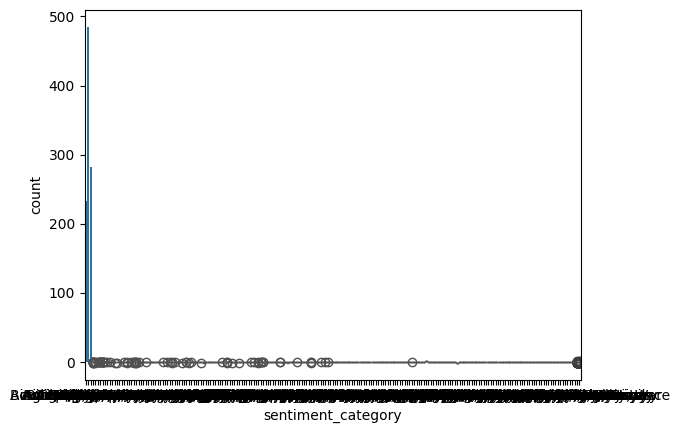

In [ ]:

import seaborn as sns

# Distribution
sns.countplot(x='sentiment_category', data=df)

# Sentiment vs Genre
sns.boxplot(x='Genre', y='sentiment_score', data=df)

# Sentiment vs Success
sns.boxplot(x='Success', y='sentiment_score', data=df)

In [ ]:


# One-hot encode categorical variables (Genre)
df_model = pd.get_dummies(df[['IMDB_Rating', 'sentiment_score', 'Genre', 'Success']], drop_first=True)

# Split data
X = df_model.drop('Success', axis=1)
y = df_model['Success']
from sklearn.model_selection import train_test_split # This line is already in the notebook in another cell but for completeness, it is added here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.84      0.75       117
           1       0.66      0.45      0.53        83

    accuracy                           0.68       200
   macro avg       0.67      0.64      0.64       200
weighted avg       0.67      0.68      0.66       200



In [ ]:
df.to_excel("processed_movie_data.xlsx", index=False)


In [ ]:
from textblob import TextBlob

def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['textblob_sentiment'] = df['Overview'].apply(textblob_sentiment)


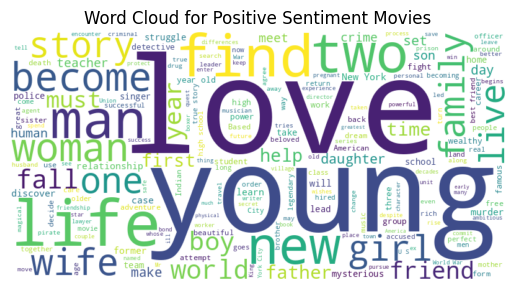

In [ ]:



from wordcloud import WordCloud
import matplotlib.pyplot as plt # Import the matplotlib library

# For positive sentiment
positive_reviews = ' '.join(df[df['sentiment_category'] == 'Positive']['Overview'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiment Movies")
plt.show()

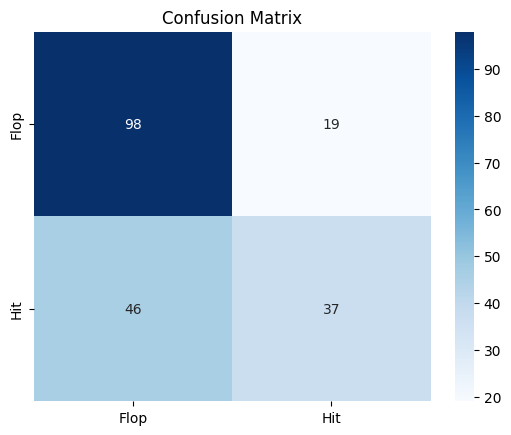

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Flop", "Hit"], yticklabels=["Flop", "Hit"])
plt.title("Confusion Matrix")
plt.show()
